In [2]:
# import all the necessary packages
import numpy as np
import pandas as pd

import warnings  
warnings.filterwarnings("ignore")


In [3]:
# import data into Python
df_game_rev = pd.read_csv('game_reviews.csv')

df_game_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         15000 non-null  int64 
 1   verified        15000 non-null  bool  
 2   reviewTime      15000 non-null  object
 3   reviewerID      15000 non-null  object
 4   reviewerName    15000 non-null  object
 5   reviewText      14990 non-null  object
 6   summary         14998 non-null  object
 7   unixReviewTime  15000 non-null  int64 
 8   image           160 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 952.3+ KB


In [4]:
df_game_rev['reviewText']

0        When it comes to a DM's screen, the space on t...
1        An Open Letter to GaleForce9*:\n\nYour unpaint...
2        Nice art, nice printing.  Why two panels are f...
3        Amazing buy! Bought it as a gift for our new d...
4        As my review of GF9's previous screens these w...
                               ...                        
14995    Garbage.  Broke after 1 use.  Absolutely ridic...
14996    Our granddaughter loves these as part of her b...
14997    Got water in it after the first use. Shorted o...
14998                  I like print vs digital scheduling.
14999    This has been our lifesaver! Our 1 year old bo...
Name: reviewText, Length: 15000, dtype: object

## 3. Investigate tweets

In [5]:
# Import nltk and the required resources
!pip3 install nltk
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Saurabh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/Saurabh/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [6]:
# Determine values of output
results_list_values = df_game_rev['reviewText'].values
type(results_list_values)

numpy.ndarray

In [7]:
# Look at one raw game review text and it's type
print(results_list_values[0])
type(results_list_values[0])

When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.


str

In [8]:
# Split up each review into individual words
results_list_values_token = [word_tokenize(str(_)) for _ in results_list_values]

In [9]:
# Get a list of all english words so we can exclude anything that doesnt appear on the list
all_english_words = set(words.words())

In [10]:
# Some pre-processing:
#-- lets get every word
#-- lets convert it to lowercase
#-- only include if the word is alphanumeric and if it is in the list of English words.

results_list_values_token_nostop =\
[[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words]\
 for x in results_list_values_token]

In [11]:
# Let's have a look at the same review as above
results_list_values_token_nostop[0]

['comes',
 'screen',
 'space',
 'screen',
 'absolute',
 'premium',
 'fact',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'art',
 'well',
 'completely',
 'useless',
 'reason',
 'gave',
 'technically',
 'speaking',
 'least',
 'still',
 'stand',
 'block',
 'dice',
 'ball',
 'completely']

# NLTK sentiment analysis 
## 1. Import NLTK

In [12]:
# import the prebuilt rules and values of the vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Saurabh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
# Import the vader classs and create a object of the analyzer called Darth Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia
darth_vader = SentimentIntensityAnalyzer()

In [14]:
# Run through a dictionary comprehension to take every cleaned tweet 
# Next run the polarity score function on the string.
# This will return four values in a dictionary

results_list_values_token_nostop_polarity =\
{" ".join(_) : darth_vader.polarity_scores(" ".join(_)) for _ in results_list_values_token_nostop}

## 2. Create a Pandas DataFrame

In [15]:
# Convert the list of dictionary results to a pandas dataframe. 
# The index is the cleaned review text
# We can see some of the highly positive words 

polarity_pd = pd.DataFrame(results_list_values_token_nostop_polarity).T

In [16]:
# With the non-aplhanumeric words (the emojis, handles, hashtags and stopwords) removed 
# some of the most positive words are single words

# Get the top 20 most positive game review words
polarity_pd.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
love great fun,0.0,0.0,1.0,0.9118
like,0.0,0.0,1.0,0.3612
easy fun,0.0,0.0,1.0,0.7351
like fun,0.0,0.0,1.0,0.7003
perfect holiday,0.0,0.0,1.0,0.7506
awesome great fan,0.0,0.0,1.0,0.8885
fun easy play fun enlightening play,0.0,0.0,1.0,0.9485
sweet,0.0,0.0,1.0,0.4588
exciting,0.0,0.0,1.0,0.4939
nice,0.0,0.0,1.0,0.4215


In [17]:
# Get the top 20 most negative game review words
polarity_pd.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
stupid,1.000,0.000,0.0,-0.5267
scary,1.000,0.000,0.0,-0.4939
crazy,1.000,0.000,0.0,-0.3400
disappointment,1.000,0.000,0.0,-0.5106
gross,1.000,0.000,0.0,-0.4767
missing,1.000,0.000,0.0,-0.2960
limited,1.000,0.000,0.0,-0.2263
difficult,1.000,0.000,0.0,-0.3612
disgusting,1.000,0.000,0.0,-0.5267
missing horrible product,0.851,0.149,0.0,-0.6908


In [18]:
# The describe function on the compound will show the distribution and moments. 
# The average is 0.6590
polarity_pd['compound'].describe()

count    13497.000000
mean         0.659056
std          0.349497
min         -0.976400
25%          0.510600
50%          0.790600
75%          0.907600
max          0.999700
Name: compound, dtype: float64

## 3. Plot the output

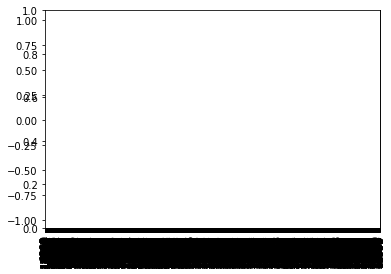

<Figure size 13680x10080 with 0 Axes>

In [19]:
# Sometimes the best way to see is to plot. 

!pip3 install matplotlib
!pip3 install seaborn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

_plot = polarity_pd.reset_index()['compound'].sort_values()
_plot.plot(kind='bar')
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.figure(figsize=(190,140))
plt.show()
plt.close()

<AxesSubplot:>

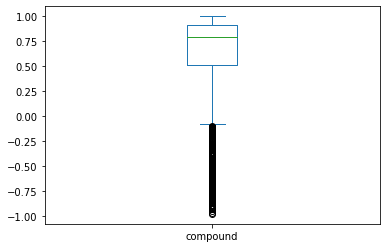

In [23]:
# The boxplot is a nice way to see how many values sit on the edges as outliers.
_plot = polarity_pd.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

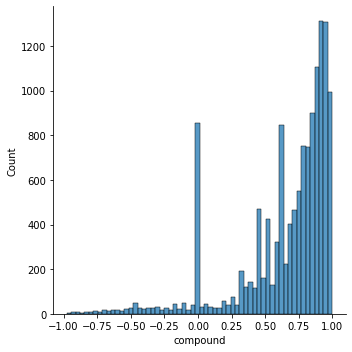

In [24]:
sns.displot(_plot)

### Key observations from above distribution plot
1. **Vast Majority** of the Reviews are **Positive** with the **Compound polarity scores** greater than **0.5**
2. **Left Skewed** distribution 
3. **Lower/Negative Polarity score** values **on the left** and more **positive polarity scores** mostly on the **right end**


In [52]:
mean=np.mean(_plot)
print(mean)

0.659056308809365


In [53]:

median=np.median(_plot)
print(median)

0.7906


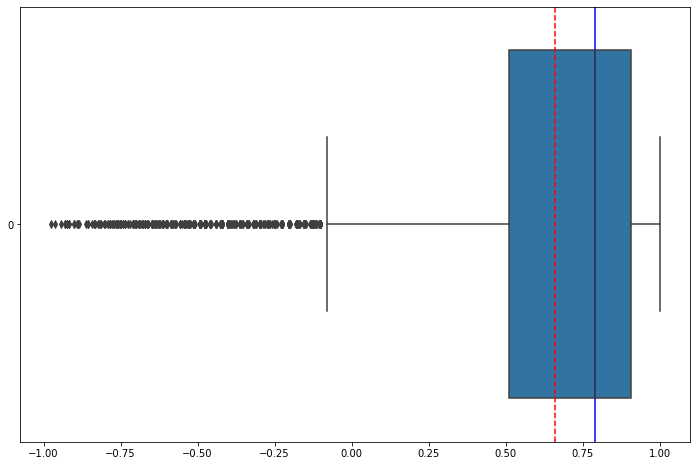

In [54]:
plt.figure(figsize=(12,8))
sns.boxplot(data=_plot, orient='h')
plt.axvline(x=median, color='blue')
plt.axvline(x=mean, color='red', linestyle='--')

### Question: What is the general sentiment of customers across all products?
### Answer: 
General Sentiment of customers across all Products is: **Positive** with the mean polarity score of **+0.6590**

**Methodology and Analysis :**

**The Polarity scores** of customer reviews across all products was obtained using vaderSentiment Analysis. These scores were normalized to obtain compound scores for all the reviews. 
- The average(mean) polarity score is: **0.6590**
- The median(central value) polarity score is : **0.7906**


In [55]:
#sense check a specific review text
results_list_values[14999]

'This has been our lifesaver! Our 1 year old boy is VERY handful in the bath. He stands, walks and crawls in the tub, licks the bottom of the tub, tries to drink the water coming out of the faucet - he just never stops moving. But now, he is so into this toy that he sits in the tub and just stares at it, bites and licks it for a good amount of time.'

In [56]:
#sense check polarity score of a specific review text
darth_vader.polarity_scores(results_list_values[14999])

{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'compound': 0.7759}

In [57]:
# Create a new Dataframe that will store all reviews and their corresponding Polarity scores (compound values)
df_text_pol = pd.DataFrame(columns={'reviewtxt', 'comp_polarity'})
#for i in results_list_values:
 #   df_text_pol['text'] v i


In [58]:
df_text_pol.shape

(0, 2)

In [59]:
df_text_pol['reviewtxt'] = results_list_values

In [60]:
df_text_pol.head()

,comp_polarity,reviewtxt
0,NaN,"When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely."
1,NaN,"An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are ""meh"". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the ""Storm King's Thunder"" adventure. Even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. I massive swath of the inner panel is wasted on artwork and a bloated overland map, which could have been easily reduced to a single panel in size. And the few table you have are nigh-useless themselves.\n\nIn short, stop making crap DM screens."
2,NaN,"Nice art, nice printing. Why two panels are filled with a general Forgotten Realms map is beyond me. Most of one of them is all blue ocean. Such a waste.\n\nI don't understand why they can't make these DM Screens more useful for these ""kinds of adventures"" rather than solely the specific adventure. You're supposed to be able to transpose this adventure to other lands outside the Forgotten Realms. So even just a list of new monsters or NPCs would at least be useful than the map. Even more would just be stuff related to running the game but broad-use stuff related to giants.\n\nSame thing with Curse of Strahd. Why not make it useful for raven loft, undead or horror campaigns in general... instead a huge amount of screen space is solely mapping out Castle Ravenloft, which is only useful during a small fraction of the time even for the Curse of Strahd adventure, let alone various other Ravenloft adventuring.\n\nThey really kill the extended use of these screens by not thinking about their potential use, both for the adventure in question, as well as use in a broader sense.\n\nThe Rage of Demons screen is far more useful for broad under dark adventuring - covering a lot of rules for the various conditions you may suffer... and the map is only one panel.\n\nThis Storm Giants one is decent for a few tables it includes - but really misses the mark. Maybe they should ask a few DMs what they would use?"
3,NaN,Amazing buy! Bought it as a gift for our new dm and it's perfect!
4,NaN,"As my review of GF9's previous screens these were completely unnecessary and nearly useless. Skip them, this is the definition of a waste of money."


In [61]:
df_text_pol['reviewtxt'][14999]

'This has been our lifesaver! Our 1 year old boy is VERY handful in the bath. He stands, walks and crawls in the tub, licks the bottom of the tub, tries to drink the water coming out of the faucet - he just never stops moving. But now, he is so into this toy that he sits in the tub and just stares at it, bites and licks it for a good amount of time.'

In [62]:
max_index = df_text_pol['reviewtxt'].index.max()
print(max_index)
print(darth_vader.polarity_scores(df_text_pol['reviewtxt'][14999])['compound'])

14999
0.7759


In [63]:
# Iterate through the dataframe using index values and generate polarity scores for each reviewtext in the df
# For each reviewtxt, store corresponding compound polarity scores in comp_polarity column
i = 0
while i <= max_index:
    text = str(df_text_pol['reviewtxt'][i])
    polarity_val = darth_vader.polarity_scores(text)['compound']
    df_text_pol['comp_polarity'][i] = polarity_val
    i = i + 1
    



In [64]:
df_text_pol.head()

,comp_polarity,reviewtxt
0,-0.7406,"When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely."
1,0.9433,"An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are ""meh"". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the ""Storm King's Thunder"" adventure. Even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. I massive swath of the inner panel is wasted on artwork and a bloated overland map, which could have been easily reduced to a single panel in size. And the few table you have are nigh-useless themselves.\n\nIn short, stop making crap DM screens."
2,0.6939,"Nice art, nice printing. Why two panels are filled with a general Forgotten Realms map is beyond me. Most of one of them is all blue ocean. Such a waste.\n\nI don't understand why they can't make these DM Screens more useful for these ""kinds of adventures"" rather than solely the specific adventure. You're supposed to be able to transpose this adventure to other lands outside the Forgotten Realms. So even just a list of new monsters or NPCs would at least be useful than the map. Even more would just be stuff related to running the game but broad-use stuff related to giants.\n\nSame thing with Curse of Strahd. Why not make it useful for raven loft, undead or horror campaigns in general... instead a huge amount of screen space is solely mapping out Castle Ravenloft, which is only useful during a small fraction of the time even for the Curse of Strahd adventure, let alone various other Ravenloft adventuring.\n\nThey really kill the extended use of these screens by not thinking about their potential use, both for the adventure in question, as well as use in a broader sense.\n\nThe Rage of Demons screen is far more useful for broad under dark adventuring - covering a lot of rules for the various conditions you may suffer... and the map is only one panel.\n\nThis Storm Giants one is decent for a few tables it includes - but really misses the mark. Maybe they should ask a few DMs what they would use?"
3,0.8997,Amazing buy! Bought it as a gift for our new dm and it's perfect!
4,-0.6808,"As my review of GF9's previous screens these were completely unnecessary and nearly useless. Skip them, this is the definition of a waste of money."


In [65]:
df_text_pol.tail()

,comp_polarity,reviewtxt
14995,-0.8271,Garbage. Broke after 1 use. Absolutely ridiculous. Shredding my money would have been less infuriating.
14996,0.7269,Our granddaughter loves these as part of her bath time play.
14997,0.0,Got water in it after the first use. Shorted out after second use.
14998,0.3612,I like print vs digital scheduling.
14999,0.7759,"This has been our lifesaver! Our 1 year old boy is VERY handful in the bath. He stands, walks and crawls in the tub, licks the bottom of the tub, tries to drink the water coming out of the faucet - he just never stops moving. But now, he is so into this toy that he sits in the tub and just stares at it, bites and licks it for a good amount of time."


### Top 20 Positive reviews (based on sentiment polarity)

In [66]:
pd.set_option('display.max_colwidth', 200)
df_text_pol.sort_values(by='comp_polarity', ascending=False).head(20)


,comp_polarity,reviewtxt
12032,0.9999,"Eminent Domain is a game by Seth Jaffee, published by Tasty Minstrel Games. It is for 2-4 players. In this game, players will be building an empire in space. They will be surveying new planets ..."
3619,0.9998,"When I first heard about Days of Wonder's newest game, Ticket to Ride (Days of Wonder, 2004 - Alan Moon), I was excited. But how could I not be - for all of Days of Wonders games so far have been ..."
1121,0.9995,"Disclaimer: Bought this from a local store. Paid list value, but supporting local game stores helps keep them in business, and it's a rough market to keep a gaming store running. Also, I do not ow..."
7643,0.9995,"The USA version of Ticket To Ride is fun but frustratingly cutthroat; I would not recommend getting the base set without the&nbsp;<a data-hook=""product-link-linked"" class=""a-link-normal"" href=""/Da..."
879,0.9994,"Whenever I see this game on my shelf, I get a disturbing visual of Quark's big head from Star Trek: Deep Space Nine. I then picture him playing Tongo with a bunch of other Ferengi...a game that de..."
12040,0.9994,"So I went camping as kind of a chaperone with a youth group and learned to play this game at a picnic table. The occasional breeze made so many stacks of card perilous, but it would have been too..."
1666,0.9993,"If you only employ one creativity-enhancing resource for the rest of your life, make that resource the Ball of Whacks!\n\nBreakthroughs in effective creativity-inspiring methods seldom occur. Mos..."
13990,0.9992,"This is an in-depth review of the product ""Robotech RPG Tactics Starter Board Game.""\n\n1) OPENING THE BOX\n\nThe first thing you'll notice about Robotech: RPG Tactics is the sheer size of the box..."
11188,0.9992,The game is easy to learn and explain. One person draws a card and selects a question from it to read out loud. Everyone else writes down an answer that they think the reader will think is the bes...
6425,0.9992,"I needed that route! You just cut me off, now instead of destination cards giving me gobs of points, now they all count against me. Theres no way around! My nerves have never felt more vexed th..."


### Top 20 Negative reviews (based on sentiment polarity)

In [67]:
pd.set_option('display.max_colwidth', 200)
df_text_pol.sort_values(by='comp_polarity', ascending=False).tail(20)

,comp_polarity,reviewtxt
1015,-0.93,"I wish I'd watched some of the gameplay videos of Ashardalon before buying. As others have mentioned, it's not an RPG, it's a board game. But as a board game, it's a particularly bad boardgame. It..."
901,-0.93,"Acquire is a great game of luck, strategy, and (like monopoly) can teach people about capitalism. This new updated version from Hasbro does just that. It is a sadly cheap and flimsy copy of the or..."
14977,-0.9311,This bath toy needs to taken off the market! Its worthless in every way! It never fit together. It began leaking immediately. Within 5 minutes it was a dead toy. My two little ones were so disappo...
12203,-0.9331,"For those who are fascinated by the Ray Kurzweil future of superintelligent machines and transhumanism, this RPG is the one for you. In the untold future, mankind has expanded out into the solar s..."
3628,-0.9337,Really excited to receive my game. But unfortunately the outside of the box was damaged when I received it. A corner is basically ripped off. Im sort of a board game freak so this made me sad.
363,-0.9349,"I found that this card game does the opposite of what it was intended for. It actually has the kids focusing on ways to get angry, etc. instead of teaching how to be calm and act better. It really..."
10755,-0.9357,We heard about Elf on a Shelf from some friends and loved this concept! I went to the Hallmark store and purchased one. We loved the book but were so disappointed with the quality of the Elf. I...
3964,-0.9366,"We opened this gift for Christmas today but had bought on Prime Day. The box was damaged to where it barely holds things together. They also failed to include all of the color cards, so we cant pl..."
11163,-0.9441,"I have now use this deck a few times, and while I was saddened that all the pieces were card board and SMALLER the the regular sets, I love playing with Pooky. I have struggled finding the right c..."
10640,-0.9484,"Okay, here is the real deal on this product... The story is cute, the website is also cute, the doll is not the cutest by today's standards but is very reminisent of vintage Christmas ornaments. T..."


#### More detailed Positive / Negative Review Texts in Full can be obtained with below code

In [68]:
# More detailed Positive / Negative Review Texts in Full can be obtained with below code
pd.set_option('display.max_colwidth', None)

#Top 20 Positive Reviews in Full
df_text_pol.sort_values(by='comp_polarity', ascending=False).head(20)


comp_polarity  \
12032        0.9999   
3619         0.9998   
1121         0.9995   
7643         0.9995   
879          0.9994   
12040        0.9994   
1666         0.9993   
13990        0.9992   
11188        0.9992   
6425         0.9992   
3571         0.9992   
358          0.9991   
1570         0.9991   
6461         0.9991   
7402          0.999   
857          0.9989   
2634         0.9988   
12043        0.9987   
1295         0.9987   
5368         0.9986   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [69]:

#Top 20 Negative Reviews in Full
df_text_pol.sort_values(by='comp_polarity', ascending=False).tail(20)

,comp_polarity,reviewtxt
1015,-0.93,"I wish I'd watched some of the gameplay videos of Ashardalon before buying. As others have mentioned, it's not an RPG, it's a board game. But as a board game, it's a particularly bad boardgame. It's punishingly difficult, and there is little theme. It begs for house rules to clean up the terrible Encounter Card system.\n\nI tried playing aggressively, and was quickly overwhelmed with critters to kill. I tried playing cautiously, and my party was wrecked by encounter cards. It just doesn't feel like a proper dungeon crawl if you've killed five monsters and lost half of your characters' HP before you've left sight of the staircase. It's more like a combat game set in a wacky arena where bad stuff happens all the time. Seen another way, it is like a puzzle game, where you have to balance risk (generally too much) against reward (generally too little), and hopefully survive long enough to reach the objective. But in no way does it feel like a dungeon crawl. And, importantly, it's a poor introduction to RPG elements.\n\nBut clearly I am in the minority; this is a well-reviewed game. I simply wish to offer a dissenting opinion. To me, Ashardalon is not fun to play.\n\nI'm selling my copy and I'm going to try Mice and Mystics instead. That looks more like what I was hoping Ashardalon would be, with a balance of teen-friendly story, adventure, and combat, with no need for a DM. I'm also eager to try Arcadia Quest.\n\nI grant two stars in my review instead of one because the bits in the box are FANTASTIC. Excellent miniatures and board pieces. It's top-notch presentation, and looks fantastic when you take it all out of the box."
901,-0.93,"Acquire is a great game of luck, strategy, and (like monopoly) can teach people about capitalism. This new updated version from Hasbro does just that. It is a sadly cheap and flimsy copy of the original. The stock certificates are nice done. But the game board is weak, and the tiles are quite simply pitiful. Hasbro will no doubt make money, as no matter the cost to teh consumer, the cost of production must be essentiall nothing. Games are improved by the tactile: the feel of teh pieces in your hand, the way they work on the board, their physicality. This new edition was clearly designed by someone who just doesnt play board games. Sadly, its just cheap."
14977,-0.9311,This bath toy needs to taken off the market! Its worthless in every way! It never fit together. It began leaking immediately. Within 5 minutes it was a dead toy. My two little ones were so disappointed.
12203,-0.9331,"For those who are fascinated by the Ray Kurzweil future of superintelligent machines and transhumanism, this RPG is the one for you. In the untold future, mankind has expanded out into the solar system, and using a unique technology that allows us to ""resleeve"" our consciousness into new physical bodies, we have all but defeated death. It's not all good, however. Extinction-level threats are amassing at all sides, and it is up to Firewall, a covert ops team destined to fight the TITANs, Exsurgent Virus, and all of the other things that go bump in the dark of space, to stop them.\n\nThis is an incredible game with equally incredible backstory. Buy it for the story, but keep it for the game. If you want more transhuman fiction, you can also look up the Takeshi Kovacs trilogy from Richard K. Morgan, which is where much of the tech in Eclipse Phase is based off of. Enjoy!\n\n<a data-hook=""product-link-linked"" class=""a-link-normal"" href=""/Altered-Carbon-A-Takeshi-Kovacs-Novel-Takeshi-Kovacs-Novels/dp/0345457692/ref=cm_cr_arp_d_rvw_txt?ie=UTF8"">Altered Carbon: A Takeshi Kovacs Novel (Takeshi Kovacs Novels)</a>"
3628,-0.9337,Really excited to receive my game. But unfortunately the outside of the box was damaged when I received it. A corner is basically ripped off. Im sort of a board game freak so this made me sad.
363,-0.9349,"I found that this card game does the opposite of what it wa

## --- End of Code ---